#### Experiments to be sorted later

What I need to do:

-Validate RF on different scoring metric

-Parameter tuning of RF



Data cleaning:
-average double entries
-use maccskeys for a RF

New dataset:
-fix variability above 100 down to 100
-

In [1]:
# temporary working here to deal with double values and insert it later as new section before section joining

In [21]:
import numpy as np
import pandas as pd

In [40]:
# drugCombDB data
dta = pd.read_csv("../drugCombDBdata/synergy-score-data/REGRdrugcombs_scored.csv")
print(str(len(dta))+" different Combinations")
dta.dropna(inplace=True)

dta["Drug1"] = pd.Series(dta["Drug1"],dtype="string").str.lower()
dta["Drug2"] = pd.Series(dta["Drug2"],dtype="string").str.lower()

dta.reset_index(drop=True,inplace=True)
dta.head(2)

498865 different Combinations


,ID,Drug1,Drug2,Cell line,ZIP,Bliss,Loewe,HSA
0,1,5-fu,abt-888,A2058,1.72,6.26,-2.75,5.54
1,2,5-fu,abt-888,A2058,5.88,12.33,3.33,11.61


## do this after dropping duplicates, else everything is a duplikate

# double Data
dataReversed = dta
dataReversed = dataReversed.rename(columns={"Drug1":"Drug2","Drug2":"Drug1"})

dataDouble = dta.append(dataReversed)
dataDouble.drop("ID",axis=1,inplace=True)
dataDouble.reset_index(inplace=True)
dataDouble.drop("index",axis=1,inplace=True)

print(len(dataDouble)," records in this frame")
data=dataDouble
dataDouble.head(2)

In [4]:
# concatenate Drug1 and 2 alphabetically - TIME: 14 mins
data = dta
sorted_conc_drugs=[]
for row in range(len(data)):
    d1 = data.iloc[row]["Drug1"]
    d2 = data.iloc[row]["Drug2"]
    if d1 < d2:
        sorted_conc_drugs.append(d1+d2+data.iloc[row]["Cell line"])
    else:
        sorted_conc_drugs.append(d2+d1+data.iloc[row]["Cell line"])
sorted_conc_drugs = pd.Series(sorted_conc_drugs)

### I had the problem that the concatenated names did not match the original ones. Fix this issue here and then execute the cells below for replacing the Duplikates 

In [43]:
# attach the joined names to the dataframe
numerator = pd.DataFrame(list(set(sorted_conc_drugs)))
numerator.reset_index(inplace=True)

data['drug_drug2'] = sorted_conc_drugs
data = data.join(numerator.set_index(0),on="drug_drug2",how="left")

In [44]:
#get the 2 new columns to the beginning
 
cols = data.columns.tolist()
cols = cols[-2:] + cols[:-2]
cols = cols[0:1] + cols[2:9] + cols[1:2] + cols[9:]
data = data[cols]
data.head()

,drug_drug2,ID,Drug1,Drug2,Cell line,ZIP,Bliss,Loewe,index,HSA
0,5-fuabt-888A2058,1,5-fu,abt-888,A2058,1.72,6.26,-2.75,284469,5.54
1,5-fuabt-888A2058,2,5-fu,abt-888,A2058,5.88,12.33,3.33,284469,11.61
2,5-fuabt-888A2058,3,5-fu,abt-888,A2058,3.59,11.66,2.65,284469,10.94
3,5-fuabt-888A2058,4,5-fu,abt-888,A2058,-0.85,5.15,-3.86,284469,4.43
4,5-fuazd1775A2058,5,5-fu,azd1775,A2058,12.29,15.77,10.40,29611,18.66


In [45]:
print("In this dataset there are")
print(len(data["index"].unique()), " drug-drug-cell combinations")
print("that have only been tested once")
print("\n","additionally there are less than ",sum(data["index"].duplicated())/2," combinations that are tested more than once")

In this dataset there are
405745  drug-drug-cell combinations
that have only been tested once

 additionally there are less than  46554.5  combinations that are tested more than once


In [46]:
data

,drug_drug2,ID,Drug1,Drug2,Cell line,ZIP,Bliss,Loewe,index,HSA
0,5-fuabt-888A2058,1,5-fu,abt-888,A2058,1.720,6.260,-2.750,284469,5.540
1,5-fuabt-888A2058,2,5-fu,abt-888,A2058,5.880,12.330,3.330,284469,11.610
2,5-fuabt-888A2058,3,5-fu,abt-888,A2058,3.590,11.660,2.650,284469,10.940
3,5-fuabt-888A2058,4,5-fu,abt-888,A2058,-0.850,5.150,-3.860,284469,4.430
4,5-fuazd1775A2058,5,5-fu,azd1775,A2058,12.290,15.770,10.400,29611,18.660
...,...,...,...,...,...,...,...,...,...,...
498849,mitomycin cvalproic acid sodium saltDIPG25,498861,mitomycin c,valproic acid sodium salt,DIPG25,-3.076,-11.124,-6.078,245634,-6.367
498850,cyaneinvalproic acid sodium saltDIPG25,498862,cyanein,valproic acid sodium salt,DIPG25,1.320,-1.091,-16.157,339273,1.139
498851,erlotinibvalproic acid sodium saltDIPG25,498863,erlotinib,valproic acid sodium salt,DIPG25,-15.768,-15.776,-25.465,177348,-6.212
498852,bafilomycin a1valproic acid sodium saltDIPG25,498864,bafilomycin a1,valproic acid sodium salt,DIPG25,2.208,10.567,-9.455,268238,1.525


In [62]:
%%capture --no-stdout
print("hi")

hi


In [66]:
%%capture --no-stdout

countDuplikates = []
i=0


for comb in set(data[data["index"].duplicated()]["index"]):
    
    subdf = data[data["index"]==comb]
    i+=1

    #time measurement
    if i%5000 == 0:
        try:
            print("total indices ",i)
        except:
            print("some error")
    
    # for later statistics
    countDuplikates.append(len(subdf))
    
    # compute mean of each series of experiements & set it as values for the first occurence. I'll drop the rest later
    means = np.mean(subdf)
    data["HSA"][subdf.iloc[0]["ID"]-1] = means["HSA"]
    data["ZIP"][subdf.iloc[0]["ID"]-1] = means["ZIP"]
    data["Bliss"][subdf.iloc[0]["ID"]-1] = means["Bliss"]
    data["Loewe"][subdf.iloc[0]["ID"]-1] = means["Loewe"]

total indices  5000
total indices  10000
total indices  15000
total indices  20000
total indices  25000
total indices  30000
total indices  35000
total indices  40000


Keep first here

then separate from extreme HSA scores

then compare dummy & RFs again

In [69]:
data = data.drop_duplicates(subset="index",keep="first")

(array([   298.,    327.,    917.,   3909., 107800., 178513.,   6427.,
          1140.,    426.,    243.]),
 array([-87.82 , -70.607, -53.394, -36.181, -18.968,  -1.755,  15.458,
         32.671,  49.884,  67.097,  84.31 ]),
 <BarContainer object of 10 artists>)

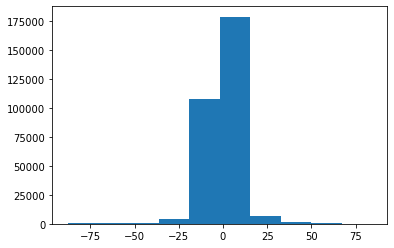

In [81]:
import matplotlib.pyplot as plt
plt.hist(data["HSA"][0:300000])

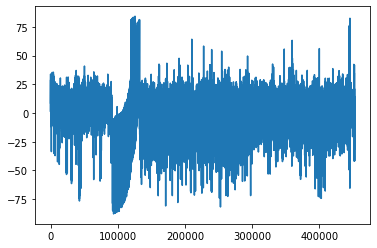

In [102]:
plt.plot(data["HSA"][0:370000])

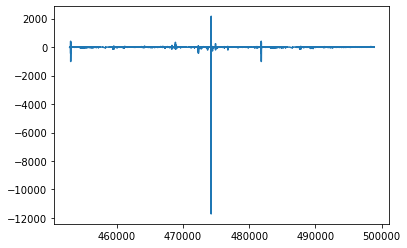

In [104]:
plt.plot(data["HSA"][370000:])